## 2.2 PyTorch第一步

PyTorch的简洁设计使得它入门很简单，在深入介绍PyTorch之前，本节将先介绍一些PyTorch的基础知识，使得读者能够对PyTorch有一个大致的了解，并能够用PyTorch搭建一个简单的神经网络。部分内容读者可能暂时不太理解，可先不予以深究，本书的第3章和第4章将会对此进行深入讲解。

本节内容参考了PyTorch官方教程[^1]并做了相应的增删修改，使得内容更贴合新版本的PyTorch接口，同时也更适合新手快速入门。另外本书需要读者先掌握基础的Numpy使用，其他相关知识推荐读者参考CS231n的教程[^2]。

[^1]: http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
[^2]: http://cs231n.github.io/python-numpy-tutorial/

### Tensor

Tensor是PyTorch中重要的数据结构，可认为是一个高维数组。它可以是一个数（标量）、一维数组（向量）、二维数组（矩阵）以及更高维的数组。Tensor和Numpy的ndarrays类似，但Tensor可以使用GPU进行加速。Tensor的使用和Numpy及Matlab的接口十分相似，下面通过几个例子来看看Tensor的基本使用。

In [1]:
import torch
torch.__version__

'1.0.0'

In [2]:
x = torch.empty(5,3) # 构建一个5x3的矩阵，未初始化（和上式效果相同）
x

tensor([[0.0000e+00, 3.6893e+19, 0.0000e+00],
        [3.6893e+19, 1.1210e-44, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 8.1688e-36, 1.4013e-45],
        [1.4013e-45, 1.7743e+28, 0.0000e+00]])

In [3]:
# 构建 5x3 矩阵，只是分配了空间，未初始化（和上式效果相同）
x = torch.Tensor(5, 3)
x

tensor([[0.0000e+00, 3.6893e+19, 0.0000e+00],
        [3.6893e+19, 7.0065e-45, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.4013e-45]])

In [4]:
x = torch.Tensor([[1,2],[3,4]])
x

tensor([[1., 2.],
        [3., 4.]])

In [5]:
# 使用[0,1)均匀分布随机初始化二维数组 
x = torch.rand(5, 3)  
x

tensor([[0.5629, 0.6207, 0.3356],
        [0.7451, 0.2771, 0.8395],
        [0.0737, 0.2745, 0.2708],
        [0.7201, 0.0539, 0.5148],
        [0.1069, 0.6084, 0.6739]])

In [6]:
print(x.size()) # 查看x的形状
x.size()[1], x.size(1) # 查看列的个数, 两种写法等价

torch.Size([5, 3])


(3, 3)

In [7]:
x = torch.zeros(5,3,dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [8]:
x.dtype

torch.int64

In [9]:
x = x.new_ones(5,3,dtype=torch.double)
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [10]:
x = torch.randn_like(x,dtype=torch.float)
x

tensor([[ 0.7960,  0.8892, -0.3229],
        [ 1.0846, -0.7449, -0.5124],
        [-1.4120, -0.0621, -0.1565],
        [ 0.0640, -0.1230, -0.0433],
        [-0.2330, -1.1343,  0.5329]])

`torch.Size` 是tuple对象的子类，因此它支持tuple的所有操作，如x.size()[0]

In [11]:
y = torch.rand(5, 3)
# 加法的第一种写法
x + y

tensor([[ 1.4182,  1.7069,  0.1746],
        [ 1.3468, -0.6214, -0.3129],
        [-0.8511,  0.6042,  0.8131],
        [ 0.7636,  0.0046,  0.7750],
        [ 0.3578, -0.4787,  1.0114]])

In [12]:
# 加法的第二种写法
torch.add(x, y)

tensor([[ 1.4182,  1.7069,  0.1746],
        [ 1.3468, -0.6214, -0.3129],
        [-0.8511,  0.6042,  0.8131],
        [ 0.7636,  0.0046,  0.7750],
        [ 0.3578, -0.4787,  1.0114]])

In [13]:
# 加法的第三种写法：指定加法结果的输出目标为result
result = torch.Tensor(5, 3) # 预先分配空间
torch.add(x, y, out=result) # 输入到result
result

tensor([[ 1.4182,  1.7069,  0.1746],
        [ 1.3468, -0.6214, -0.3129],
        [-0.8511,  0.6042,  0.8131],
        [ 0.7636,  0.0046,  0.7750],
        [ 0.3578, -0.4787,  1.0114]])

In [14]:
print('最初y')
print(y)

print('第一种加法，y的结果')
y.add(x) # 普通加法，不改变y的内容
print(y)

print('第二种加法，y的结果')
y.add_(x) # inplace 加法，y变了
print(y)

最初y
tensor([[0.6222, 0.8177, 0.4975],
        [0.2622, 0.1234, 0.1995],
        [0.5608, 0.6663, 0.9696],
        [0.6996, 0.1276, 0.8182],
        [0.5907, 0.6557, 0.4785]])
第一种加法，y的结果
tensor([[0.6222, 0.8177, 0.4975],
        [0.2622, 0.1234, 0.1995],
        [0.5608, 0.6663, 0.9696],
        [0.6996, 0.1276, 0.8182],
        [0.5907, 0.6557, 0.4785]])
第二种加法，y的结果
tensor([[ 1.4182,  1.7069,  0.1746],
        [ 1.3468, -0.6214, -0.3129],
        [-0.8511,  0.6042,  0.8131],
        [ 0.7636,  0.0046,  0.7750],
        [ 0.3578, -0.4787,  1.0114]])


注意，函数名后面带下划线**`_`** 的函数会修改Tensor本身。例如，`x.add_(y)`和`x.t_()`会改变 `x`，但`x.add(y)`和`x.t()`返回一个新的Tensor， 而`x`不变。

In [15]:
# Tensor的选取操作与Numpy类似
x[:, 1]

tensor([ 0.8892, -0.7449, -0.0621, -0.1230, -1.1343])

In [16]:
# Resizing: 如果想要resize/reshape tensor,可以使用torch.view
x = torch.randn(4,4)
print(x)
y = x.view(16)
print(y)
z = x.view(-1,8)
print(z)

print(x.size(),y.size(),z.size())

tensor([[ 0.7125, -1.5150,  0.0103,  0.4131],
        [ 0.4273,  0.6137,  0.9497, -0.9753],
        [-0.3090,  1.1144,  0.4981,  1.1026],
        [-0.1127, -0.6556, -0.7454, -0.6427]])
tensor([ 0.7125, -1.5150,  0.0103,  0.4131,  0.4273,  0.6137,  0.9497, -0.9753,
        -0.3090,  1.1144,  0.4981,  1.1026, -0.1127, -0.6556, -0.7454, -0.6427])
tensor([[ 0.7125, -1.5150,  0.0103,  0.4131,  0.4273,  0.6137,  0.9497, -0.9753],
        [-0.3090,  1.1144,  0.4981,  1.1026, -0.1127, -0.6556, -0.7454, -0.6427]])
torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


Tensor还支持很多操作，包括数学运算、线性代数、选择、切片等等，其接口设计与Numpy极为相似。更详细的使用方法，会在第三章系统讲解。

Tensor和Numpy的数组之间的互操作非常容易且快速。对于Tensor不支持的操作，可以先转为Numpy数组处理，之后再转回Tensor。c



In [17]:
a = torch.ones(5) # 新建一个全1的Tensor
a

tensor([1., 1., 1., 1., 1.])

In [18]:
b = a.numpy() # Tensor -> Numpy
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [19]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a) # Numpy->Tensor
print(a)
print(b) 

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


Tensor和numpy对象共享内存，所以他们之间的转换很快，而且几乎不会消耗什么资源。但这也意味着，如果其中一个变了，另外一个也会随之改变。

In [20]:
b.add_(1) # 以`_`结尾的函数会修改自身
print(a)
print(b) # Tensor和Numpy共享内存

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


如果你想获取某一个元素的值，可以使用`scalar.item`。 直接`tensor[idx]`得到的还是一个tensor: 一个0-dim 的tensor，一般称为scalar.

In [21]:
scalar = b[0]
scalar

tensor(2., dtype=torch.float64)

In [22]:
scalar.size() #0-dim

torch.Size([])

In [23]:
scalar.item() # 使用scalar.item()能从中取出python对象的数值

2.0

In [24]:
tensor = torch.tensor([2]) # 注意和scalar的区别
tensor,scalar

(tensor([2]), tensor(2., dtype=torch.float64))

In [25]:
tensor.size(),scalar.size()

(torch.Size([1]), torch.Size([]))

In [26]:
# 只有一个元素的tensor也可以调用`tensor.item()`
tensor.item(), scalar.item()

(2, 2.0)

此外在pytorch中还有一个和`np.array` 很类似的接口: `torch.tensor`, 二者的使用十分类似。

In [27]:
tensor1 = torch.tensor([5.5,3])
print(tensor1)

tensor([5.5000, 3.0000])


In [28]:
tensor2 = torch.tensor([3,4]) # 新建一个包含 3，4 两个元素的tensor

In [29]:
scalar = torch.tensor(3)
scalar

tensor(3)

In [30]:
old_tensor = tensor2
new_tensor = torch.tensor(old_tensor)   # 不推荐，可使用下面的old_tensor.clone().detach()
new_tensor[0] = 1111
old_tensor, new_tensor

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


(tensor([3, 4]), tensor([1111,    4]))

In [31]:
old_tensor.clone().detach()

tensor([3, 4])

In [32]:
new_tensor = old_tensor.clone().detach()
new_tensor[0] = 1111
old_tensor, new_tensor

(tensor([3, 4]), tensor([1111,    4]))

需要注意的是，`t.tensor()`总是会进行数据拷贝，新tensor和原来的数据不再共享内存。所以如果你想共享内存的话，建议使用`torch.from_numpy()`或者`tensor.detach()`来新建一个tensor, 二者共享内存。

In [33]:
new_tensor = old_tensor.detach()
new_tensor[0] = 1111
old_tensor, new_tensor

(tensor([1111,    4]), tensor([1111,    4]))

Tensor可通过`.cuda` 方法转为GPU的Tensor，从而享受GPU带来的加速运算。

In [34]:
# 在不支持CUDA的机器下，下一步还是在CPU上运行
x = torch.randn(4,4)
y = torch.randn(4,4)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
x = x.to(device)
y = y.to(device)
z = x+y

此外，还可以使用`tensor.cuda()` 的方式将tensor拷贝到gpu上，但是这种方式不太推荐。

此处可能发现GPU运算的速度并未提升太多，这是因为x和y太小且运算也较为简单，而且将数据从内存转移到显存还需要花费额外的开销。GPU的优势需在大规模数据和复杂运算下才能体现出来。


### autograd: 自动微分

深度学习的算法本质上是通过反向传播求导数，而PyTorch的**`autograd`**模块则实现了此功能。在Tensor上的所有操作，autograd都能为它们自动提供微分，避免了手动计算导数的复杂过程。
 
~~`autograd.Variable`是Autograd中的核心类，它简单封装了Tensor，并支持几乎所有Tensor有的操作。Tensor在被封装为Variable之后，可以调用它的`.backward`实现反向传播，自动计算所有梯度~~ ~~Variable的数据结构如图2-6所示。~~


![图2-6:Variable的数据结构](imgs/autograd_Variable.svg)

  *从0.4起, Variable 正式合并入Tensor, Variable 本来实现的自动微分功能，Tensor就能支持。读者还是可以使用Variable(tensor), 但是这个操作其实什么都没做。建议读者以后直接使用tensor*. 
  
  要想使得Tensor使用autograd功能，只需要设置`tensor.requries_grad=True`. 


In [35]:
# 为tensor设置 requires_grad 标识，代表着需要求导数
# pytorch 会自动调用autograd 记录操作
x = torch.ones(2, 2, requires_grad=True)

# 上一步等价于
# x = t.ones(2,2)
# x.requires_grad = True

x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [36]:
y = x.sum()
y

tensor(4., grad_fn=<SumBackward0>)

In [37]:
y.grad_fn

In [38]:
y.backward() # 反向传播,计算梯度

In [39]:
# y = x.sum() = (x[0][0] + x[0][1] + x[1][0] + x[1][1])
# 每个值的梯度都为1
x.grad 

tensor([[1., 1.],
        [1., 1.]])

注意：`grad`在反向传播过程中是累加的(accumulated)，这意味着每一次运行反向传播，梯度都会累加之前的梯度，所以反向传播之前需把梯度清零。

In [40]:
y.backward()
x.grad

tensor([[2., 2.],
        [2., 2.]])

In [41]:
y.backward()
x.grad

tensor([[3., 3.],
        [3., 3.]])

In [42]:
# 以下划线结束的函数是inplace操作，会修改自身的值，就像add_
x.grad.data.zero_()

tensor([[0., 0.],
        [0., 0.]])

In [43]:
y.backward()
x.grad

tensor([[1., 1.],
        [1., 1.]])

###  神经网络

Autograd实现了反向传播功能，但是直接用来写深度学习的代码在很多情况下还是稍显复杂，torch.nn是专门为神经网络设计的模块化接口。nn构建于 Autograd之上，可用来定义和运行神经网络。nn.Module是nn中最重要的类，可把它看成是一个网络的封装，包含网络各层定义以及forward方法，调用forward(input)方法，可返回前向传播的结果。下面就以最早的卷积神经网络：LeNet为例，来看看如何用`nn.Module`实现。LeNet的网络结构如图2-7所示。

![图2-7:LeNet网络结构](imgs/nn_lenet.png)

这是一个基础的前向传播(feed-forward)网络: 接收输入，经过层层传递运算，得到输出。

#### 定义网络

定义网络时，需要继承`nn.Module`，并实现它的forward方法，把网络中具有可学习参数的层放在构造函数`__init__`中。如果某一层(如ReLU)不具有可学习的参数，则既可以放在构造函数中，也可以不放，但建议不放在其中，而在forward中使用`nn.functional`代替。

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        # nn.Module子类的函数必须在构造函数中执行父类的构造函数
        # 下式等价于nn.Module.__init__(self)
        super(Net, self).__init__()
        
        # 卷积层 '1'表示输入图片为单通道, '6'表示输出通道数，'5'表示卷积核为5*5
        self.conv1 = nn.Conv2d(1, 6, 5) 
        # 卷积层
        self.conv2 = nn.Conv2d(6, 16, 5) 
        # 仿射层/全连接层，y = Wx + b
        self.fc1   = nn.Linear(16*5*5, 120) 
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x): 
        # 卷积 -> 激活 -> 池化 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        # reshape，‘-1’表示自适应
        x = x.view(-1, self.num_flat_features(x)) # x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


只要在nn.Module的子类中定义了forward函数，backward函数就会自动被实现(利用`autograd`)。在`forward` 函数中可使用任何tensor支持的函数，还可以使用if、for循环、print、log等Python语法，写法和标准的Python写法一致。

网络的可学习参数通过`net.parameters()`返回，`net.named_parameters`可同时返回可学习的参数及名称。

In [45]:
params = list(net.parameters())
print(len(params))

10


In [46]:
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


forward函数的输入和输出都是Tensor。

In [47]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
out.size()

torch.Size([1, 10])

In [48]:
net.zero_grad() # 所有参数的梯度清零
out.backward(torch.ones(1,10)) # 反向传播

需要注意的是，torch.nn只支持mini-batches，不支持一次只输入一个样本，即一次必须是一个batch。但如果只想输入一个样本，则用 `input.unsqueeze(0)`将batch_size设为１。例如 `nn.Conv2d` 输入必须是4维的，形如$nSamples \times nChannels \times Height \times Width$。可将nSample设为1，即$1 \times nChannels \times Height \times Width$。

#### 损失函数

nn实现了神经网络中大多数的损失函数，例如nn.MSELoss用来计算均方误差，nn.CrossEntropyLoss用来计算交叉熵损失。

In [49]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target) # loss是个scalar
print(loss)

tensor(0.3465, grad_fn=<MseLossBackward>)


In [50]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [51]:
target

tensor([[ 0.1681,  0.1446,  0.1231,  1.0206, -0.2322, -0.1221, -0.0264, -0.3731,
         -0.2134, -1.3955]])

In [52]:
target.size()

torch.Size([1, 10])

如果对loss进行反向传播溯源(使用`gradfn`属性)，可看到它的计算图如下：

```
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d  
      -> view -> linear -> relu -> linear -> relu -> linear 
      -> MSELoss
      -> loss
```

当调用`loss.backward()`时，该图会动态生成并自动微分，也即会自动计算图中参数(Parameter)的导数。

In [53]:
# 运行.backward，观察调用之前和调用之后的grad
net.zero_grad() # 把net中所有可学习参数的梯度清零
print('反向传播之前 conv1.bias的梯度')
print(net.conv1.bias.grad)
loss.backward()
print('反向传播之后 conv1.bias的梯度')
print(net.conv1.bias.grad)

反向传播之前 conv1.bias的梯度
tensor([0., 0., 0., 0., 0., 0.])
反向传播之后 conv1.bias的梯度
tensor([ 0.0112, -0.0006,  0.0083,  0.0030,  0.0075, -0.0002])


#### 优化器

在反向传播计算完所有参数的梯度后，还需要使用优化方法来更新网络的权重和参数，例如随机梯度下降法(SGD)的更新策略如下：
```
weight = weight - learning_rate * gradient
```

手动实现如下：

```python
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)# inplace 减法
```

`torch.optim`中实现了深度学习中绝大多数的优化方法，例如RMSProp、Adam、SGD等，更便于使用，因此大多数时候并不需要手动写上述代码。

In [54]:
import torch.optim as optim
#新建一个优化器，指定要调整的参数和学习率
optimizer = optim.SGD(net.parameters(), lr = 0.01)

# 在训练过程中
# 先梯度清零(与net.zero_grad()效果一样)
optimizer.zero_grad() 

# 计算损失
output = net(input)
loss = criterion(output, target)

#反向传播
loss.backward()

#更新参数
optimizer.step()

In [55]:
loss

tensor(0.3465, grad_fn=<MseLossBackward>)



####  数据加载与预处理

在深度学习中数据加载及预处理是非常复杂繁琐的，但PyTorch提供了一些可极大简化和加快数据处理流程的工具。同时，对于常用的数据集，PyTorch也提供了封装好的接口供用户快速调用，这些数据集主要保存在torchvison中。

`torchvision`实现了常用的图像数据加载功能，例如Imagenet、CIFAR10、MNIST等，以及常用的数据转换操作，这极大地方便了数据加载，并且代码具有可重用性。


### 小试牛刀：CIFAR-10分类

下面我们来尝试实现对CIFAR-10数据集的分类，步骤如下: 

1. 使用torchvision加载并预处理CIFAR-10数据集
2. 定义网络
3. 定义损失函数和优化器
4. 训练网络并更新网络参数
5. 测试网络

####   CIFAR-10数据加载及预处理

CIFAR-10[^3]是一个常用的彩色图片数据集，它有10个类别: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'。每张图片都是$3\times32\times32$，也即3-通道彩色图片，分辨率为$32\times32$。

[^3]: http://www.cs.toronto.edu/~kriz/cifar.html

In [56]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() # 可以把Tensor转成Image，方便可视化

In [57]:
# 第一次运行程序torchvision会自动下载CIFAR-10数据集，
# 大约100M，需花费一定的时间，
# 如果已经下载有CIFAR-10，可通过root参数指定

# 定义对数据的预处理
transform = transforms.Compose([
        transforms.ToTensor(), # 转为Tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # 归一化
                             ])

# 训练集
trainset = torchvision.datasets.CIFAR10(
                    root='../../data/', 
                    train=True, 
                    download=True,
                    transform=transform)

trainloader = torch.utils.data.DataLoader(
                    trainset, 
                    batch_size=4,
                    shuffle=True, 
                    num_workers=2)

# 测试集
testset = torchvision.datasets.CIFAR10(
                    '../../data/',
                    train=False, 
                    download=True, 
                    transform=transform)

testloader = torch.utils.data.DataLoader(
                    testset,
                    batch_size=4, 
                    shuffle=False,
                    num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Dataset对象是一个数据集，可以按下标访问，返回形如(data, label)的数据。

ship


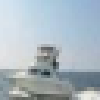

In [58]:
(data, label) = trainset[100]
print(classes[label])

# (data + 1) /p 2是为了还原被归一化的数据
show((data + 1) / 2).resize((100, 100))

In [59]:
data

tensor([[[0.6706, 0.6549, 0.6549,  ..., 0.1843, 0.1843, 0.1686],
         [0.6784, 0.6627, 0.6627,  ..., 0.1922, 0.1922, 0.1843],
         [0.6941, 0.6784, 0.6706,  ..., 0.2000, 0.2000, 0.1843],
         ...,
         [0.1373, 0.0667, 0.1216,  ..., 0.6941, 0.5373, 0.4353],
         [0.0902, 0.0118, 0.0118,  ..., 0.7804, 0.7490, 0.6392],
         [0.0745, 0.1216, 0.0667,  ..., 0.6392, 0.7020, 0.7882]],

        [[0.7961, 0.7804, 0.7804,  ..., 0.3647, 0.3647, 0.3490],
         [0.7961, 0.7804, 0.7804,  ..., 0.3725, 0.3725, 0.3647],
         [0.7961, 0.7804, 0.7804,  ..., 0.3804, 0.3804, 0.3647],
         ...,
         [0.2471, 0.1608, 0.1922,  ..., 0.7020, 0.5451, 0.4353],
         [0.2000, 0.1137, 0.0902,  ..., 0.7882, 0.7569, 0.6392],
         [0.1922, 0.2157, 0.1373,  ..., 0.6392, 0.7020, 0.7882]],

        [[0.8980, 0.8824, 0.8824,  ..., 0.6157, 0.6157, 0.6000],
         [0.8902, 0.8745, 0.8745,  ..., 0.6235, 0.6235, 0.6078],
         [0.8745, 0.8588, 0.8588,  ..., 0.6157, 0.6157, 0.

In [60]:
data.size()

torch.Size([3, 32, 32])

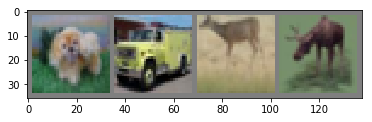

      dog     truck      deer      deer


In [63]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img *0.5 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%9s' % classes[labels[j]] for j in range(4)))

Dataloader是一个可迭代的对象，它将dataset返回的每一条数据拼接成一个batch，并提供多线程加速优化和数据打乱等操作。当程序对dataset的所有数据遍历完一遍之后，相应的对Dataloader也完成了一次迭代。

       ship        frog       horse        deer


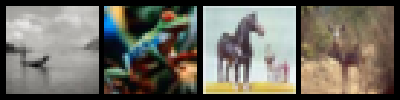

In [64]:
dataiter = iter(trainloader)
images, labels = dataiter.next() # 返回4张图片及标签
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(torchvision.utils.make_grid((images+1)/2)).resize((400,100))

####   定义网络

拷贝上面的LeNet网络，修改self.conv1第一个参数为3通道，因CIFAR-10是3通道彩图。

In [66]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

####  定义损失函数和优化器(loss和optimizer)

In [67]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss() # 交叉熵损失函数
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

###   训练网络

所有网络的训练流程都是类似的，不断地执行如下流程：

- 输入数据
- 前向传播+反向传播
- 更新参数


In [69]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 输入数据
        inputs, labels = data

        # 梯度清零
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 打印log信息
        # loss 是一个scalar,需要使用loss.item()来获取数值，不能使用loss[0]
    
        running_loss += loss.item()
        if i % 2000 == 1999:    #  每2000个batch打印一下训练状态, i表示的是the number of batches 
            print('[%d,%5d] loss: %.3f' %(epoch+1,i+1,running_loss/2000))
            running_loss = 0.0

print('Finished Training')


[1, 2000] loss: 2.185
[1, 4000] loss: 1.849
[1, 6000] loss: 1.676
[1, 8000] loss: 1.589
[1,10000] loss: 1.522
[1,12000] loss: 1.489
[2, 2000] loss: 1.424
[2, 4000] loss: 1.376
[2, 6000] loss: 1.343
[2, 8000] loss: 1.324
[2,10000] loss: 1.306
[2,12000] loss: 1.280
Finished Training


此处仅训练了2个epoch（遍历完一遍数据集称为一个epoch），来看看网络有没有效果。将测试图片输入到网络中，计算它的label，然后与实际的label进行比较。

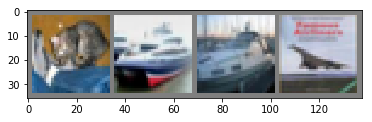

实际的label: 
      cat      ship      ship     plane


In [70]:
dataiter = iter(testloader)
images, labels = dataiter.next() # 一个batch返回4张图片

# print images
imshow(torchvision.utils.make_grid(images))
print('实际的label: ')
print(' '.join('%9s' % classes[labels[j]] for j in range(4)))


接着计算网络预测的label：

In [71]:
# 计算图片在每个类别上的分数
outputs = net(images)
# 得分最高的那个类
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


已经可以看出效果，准确率50%，但这只是一部分的图片，再来看看在整个测试集上的效果。

In [72]:
correct = 0 # 预测正确的图片数
total = 0 # 总共的图片数


# 由于测试的时候不需要求导，可以暂时关闭autograd，提高速度，节约内存
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

print('10000张测试集中的准确率为: %d %%' % (100 * correct / total))


10000张测试集中的准确率为: 56 %


训练的准确率远比随机猜测(准确率10%)好，证明网络确实学到了东西。

In [73]:
# 具体到每个类别预测的准确率
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze() # .squeeze() 去掉维数为1的的维度
        for i in range(4): # 一个batch中有4个样本
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 62 %
Accuracy of   car : 62 %
Accuracy of  bird : 40 %
Accuracy of   cat : 28 %
Accuracy of  deer : 34 %
Accuracy of   dog : 56 %
Accuracy of  frog : 75 %
Accuracy of horse : 66 %
Accuracy of  ship : 71 %
Accuracy of truck : 70 %


####  在GPU训练
就像之前把Tensor从CPU转到GPU一样，模型也可以类似地从CPU转到GPU。

In [74]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net.to(device)
images = images.to(device)
labels = labels.to(device)
output = net(images)
loss= criterion(output,labels)

loss

tensor(0.6920, grad_fn=<NllLossBackward>)

如果发现在GPU上并没有比CPU提速很多，实际上是因为网络比较小，GPU没有完全发挥自己的真正实力。

对PyTorch的基础介绍至此结束。总结一下，本节主要包含以下内容。

1. Tensor: 类似Numpy数组的数据结构，与Numpy接口类似，可方便地互相转换。
2. autograd/: 为tensor提供自动求导功能。
3. nn: 专门为神经网络设计的接口，提供了很多有用的功能(神经网络层，损失函数，优化器等)。
4. 神经网络训练: 以CIFAR-10分类为例演示了神经网络的训练流程，包括数据加载、网络搭建、训练及测试。

通过本节的学习，相信读者可以体会出PyTorch具有接口简单、使用灵活等特点。从下一章开始，本书将深入系统地讲解PyTorch的各部分知识。

### 附录：小试牛刀：CIFAR-10分类完整代码

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt


# 定义网络
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6,16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

# 加载数据集和预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
])

trainset = torchvision.datasets.CIFAR10(
    root='/Users/yanmk/学习/技术学习/LearningPyTorch/data',
    train=True,
    download=True,
    transform=transform,
)

trainloader= torch.utils.data.DataLoader(
    trainset,
    batch_size = 4,
    shuffle = True,
    num_workers = 2,
)

testset = torchvision.datasets.CIFAR10(
    root='../../data',
    train=False,
    download=True,
    transform=transform,
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle= False,
    num_workers=2,
)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



# def imshow(img):
#     img=img*0.5+0.5
#     npimg=img.numpy()
#     plt.imshow(np.transpose(npimg,(1,2,0)))
#     plt.show()
#
# dataiter = iter(trainloader)
# images,labels = dataiter.next()
# imshow(torchvision.utils.make_grid(images))
# print(' '.join('%9s' % classes[labels[j]] for j in range(4)))

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)



# 在训练集上训练模型，迭代2个epoch
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader,0):
        inputs,labels = data

        # 梯度清零
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        running_loss += loss

        if i%2000==1999: # 每2000个batch打印一下训练状态
            print('[%d,%5d] loss: %.3f' %(epoch+1,i+1,running_loss/2000))
            running_loss = 0.0
print('Finish Training...')

# 在测试集上评估模型
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images,labels= data
        outputs = net(images)
        _,predicted = torch.max(outputs.data,1) # 等价于predicted = torch.argmax(outputs,dim=1)
        total += labels.size(0)
        correct += (predicted==labels).sum()
print('10000张测试集中的准确率为: %d %%' %(100*correct/total))


# 具体到每个类别的准确率
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images,labels=data
        outputs=net(images)
        _,predicted=torch.max(outputs,1)
        c = (predicted==labels).squeeze()
        for i in range(4):
            label=labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i],100*class_correct[i]/class_total[i]))
